In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Online-Shopping-Review\\Dataset\\Online Shopping Review.csv")

# Rename The Column Names

In [3]:
my_cols=["Time","Name","Age","Gender","About Shopping","Shopping For","Finding For",
         "Visiting Issue","Compared to OS","Complacency","Find ERP","Payment Complacency",
         "CheckOut Experience","Product Receive TimeLine","Rider Review","CS Experience"]

In [4]:
df.columns=my_cols

In [5]:
#Using ' ' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['Time',
 'Name',
 'Age',
 'Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Complacency',
 'Find_ERP',
 'Payment_Complacency',
 'CheckOut_Experience',
 'Product_Receive_TimeLine',
 'Rider_Review',
 'CS_Experience']

In [6]:
df.columns=new_columns

In [7]:
df.head()

,Time,Name,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,6/17/2022 0:46:08,Rajesh Das,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,6/17/2022 1:55:47,Radhika,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,6/17/2022 1:52:21,Sourav Pathok,23,Male,Social Media,Other,Maybe,About Company,Overall,Satisfied,Yes,Safe,1,Yes,1,1
3,6/17/2022 1:57:38,Ritu,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,6/17/2022 2:01:02,Nandini,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5


# Drop  Unnecessary Columns

In [8]:
df1=df.drop(["Time","Name"],axis=1)

In [9]:
df1.shape

(982, 14)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       982 non-null    int64 
 1   Gender                    982 non-null    object
 2   About_Shopping            982 non-null    object
 3   Shopping_For              982 non-null    object
 4   Finding_For               982 non-null    object
 5   Visiting_Issue            982 non-null    object
 6   Compared_to_OS            982 non-null    object
 7   Complacency               982 non-null    object
 8   Find_ERP                  982 non-null    object
 9   Payment_Complacency       982 non-null    object
 10  CheckOut_Experience       982 non-null    int64 
 11  Product_Receive_TimeLine  982 non-null    object
 12  Rider_Review              982 non-null    int64 
 13  CS_Experience             982 non-null    int64 
dtypes: int64(4), object(10)
me

In [11]:
df1.describe()

,Age,CheckOut_Experience,Rider_Review,CS_Experience
count,982.000000,982.000000,982.000000,982.000000
mean,29.800407,4.255601,4.159878,3.906314
std,9.324531,0.976192,1.021631,1.215505
min,11.000000,1.000000,1.000000,1.000000
25%,23.000000,4.000000,4.000000,3.000000
50%,28.000000,5.000000,4.000000,4.000000
75%,34.000000,5.000000,5.000000,5.000000
max,76.000000,5.000000,5.000000,5.000000


# Checking Null Values

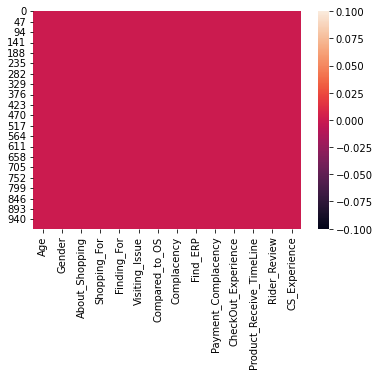

In [12]:
sns.heatmap(df1.isnull())
plt.show()

In [13]:
df1[df1.isnull().any(axis=1)].head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience


In [14]:
df1.isnull().sum()

Age                         0
Gender                      0
About_Shopping              0
Shopping_For                0
Finding_For                 0
Visiting_Issue              0
Compared_to_OS              0
Complacency                 0
Find_ERP                    0
Payment_Complacency         0
CheckOut_Experience         0
Product_Receive_TimeLine    0
Rider_Review                0
CS_Experience               0
dtype: int64

In [15]:
print("%18s %10s   %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
for col in df.columns:
    dtyp = df[col].dtype
    uniq = df[col].nunique()
    na = df[col].isna().sum()
    print("%18s %10s %10s %10s" % (col, dtyp, uniq, na))

       Column Name  Data Type    #Distinct  NA Values
              Time     object        982          0
              Name     object        934          0
               Age      int64         52          0
            Gender     object          3          0
    About_Shopping     object          6          0
      Shopping_For     object          6          0
       Finding_For     object          3          0
    Visiting_Issue     object          5          0
    Compared_to_OS     object          8          0
       Complacency     object          5          0
          Find_ERP     object          3          0
Payment_Complacency     object          5          0
CheckOut_Experience      int64          5          0
Product_Receive_TimeLine     object          3          0
      Rider_Review      int64          5          0
     CS_Experience      int64          5          0


# Seperate Categorical and Numerical Features

In [16]:
categorical_features=[]
numerical_features=[]

In [17]:
for i in df1.columns.tolist():
    if df1[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [18]:
print("-"*40)
print("Numerical Features")
print("-"*40)
for i in numerical_features:
    print('Feature: ',i)

----------------------------------------
Numerical Features
----------------------------------------
Feature:  Age
Feature:  CheckOut_Experience
Feature:  Rider_Review
Feature:  CS_Experience


In [19]:
print("-"*40)
print("Categorical Features")
print("-"*40)
for i in categorical_features:
    print('Feature:',i)

----------------------------------------
Categorical Features
----------------------------------------
Feature: Gender
Feature: About_Shopping
Feature: Shopping_For
Feature: Finding_For
Feature: Visiting_Issue
Feature: Compared_to_OS
Feature: Complacency
Feature: Find_ERP
Feature: Payment_Complacency
Feature: Product_Receive_TimeLine


# Checking Unique Value Per Column

In [20]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df[col].unique())  

-------------------
Column Name Is Gender
-------------------
['Male' 'Female' 'Other']
-------------------
Column Name Is About_Shopping
-------------------
['Newspaper' 'Social Media' 'Friend' 'TV' 'Other' 'Search Engine']
-------------------
Column Name Is Shopping_For
-------------------
['Friend' 'Other' 'Parent' 'Colleague' 'Boss' 'Me']
-------------------
Column Name Is Finding_For
-------------------
['Yes' 'Maybe' 'No']
-------------------
Column Name Is Visiting_Issue
-------------------
['Product Information' 'About Company' 'Buying Products'
 'Contact Information' 'Other']
-------------------
Column Name Is Compared_to_OS
-------------------
['Pricing' 'Website performance' 'Overall' 'Product catalog'
 'Product information' 'Shipping options' 'Online help'
 'Payment experience']
-------------------
Column Name Is Complacency
-------------------
['Neutral' 'Very satisfied' 'Satisfied' 'Dissatisfied' 'Very dissatisfied']
-------------------
Column Name Is Find_ERP
-----------

In [21]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].value_counts())  

-------------------
Column Name Is Gender
-------------------
Male      504
Female    475
Other       3
Name: Gender, dtype: int64
-------------------
Column Name Is About_Shopping
-------------------
Social Media     253
Friend           202
Search Engine    193
Newspaper        184
TV                97
Other             53
Name: About_Shopping, dtype: int64
-------------------
Column Name Is Shopping_For
-------------------
Parent       227
Friend       187
Me           182
Colleague    167
Boss         144
Other         75
Name: Shopping_For, dtype: int64
-------------------
Column Name Is Finding_For
-------------------
Yes      442
No       285
Maybe    255
Name: Finding_For, dtype: int64
-------------------
Column Name Is Visiting_Issue
-------------------
Buying Products        269
Product Information    256
About Company          201
Contact Information    190
Other                   66
Name: Visiting_Issue, dtype: int64
-------------------
Column Name Is Compared_to_OS
-------

# Co-Relation

<AxesSubplot:>

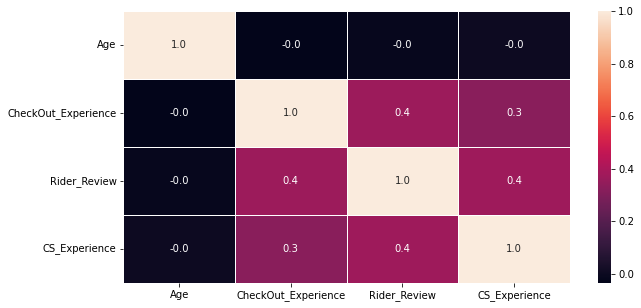

In [22]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [23]:
df1.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,23,Male,Social Media,Other,Maybe,About Company,Overall,Satisfied,Yes,Safe,1,Yes,1,1
3,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5


# Separate X and Y

In [24]:
target=df1["Complacency"]

In [25]:
features=df1.drop(["Complacency"],axis=1)

# droping Less Important Columns

In [26]:
features.columns

Index(['Age', 'Gender', 'About_Shopping', 'Shopping_For', 'Finding_For',
       'Visiting_Issue', 'Compared_to_OS', 'Find_ERP', 'Payment_Complacency',
       'CheckOut_Experience', 'Product_Receive_TimeLine', 'Rider_Review',
       'CS_Experience'],
      dtype='object')

In [27]:
le=LabelEncoder()
for i in features.columns.tolist():
    features[i]=le.fit_transform(features[i])

# Feature Selection

In [28]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit_features = test.fit(features,target)
score_col=pd.DataFrame(fit_features.scores_,columns=["Score_Value"])

In [29]:
score_col

,Score_Value
0,6.052743
1,6.823568
2,1.521589
3,1.554511
4,6.307761
5,3.808043
6,15.966282
7,4.253360
8,5.107655
9,6.392526


In [30]:
Name_col=pd.DataFrame(features.columns)

In [31]:
top_features=pd.concat([Name_col,score_col],axis=1)

In [32]:
top_features.columns=["Name","Score Value"]

In [33]:
top_features

,Name,Score Value
0,Age,6.052743
1,Gender,6.823568
2,About_Shopping,1.521589
3,Shopping_For,1.554511
4,Finding_For,6.307761
5,Visiting_Issue,3.808043
6,Compared_to_OS,15.966282
7,Find_ERP,4.253360
8,Payment_Complacency,5.107655
9,CheckOut_Experience,6.392526


In [34]:
top_features.nlargest(8,"Score Value")

,Name,Score Value
6,Compared_to_OS,15.966282
1,Gender,6.823568
9,CheckOut_Experience,6.392526
4,Finding_For,6.307761
0,Age,6.052743
10,Product_Receive_TimeLine,5.829346
8,Payment_Complacency,5.107655
11,Rider_Review,4.294203


# Dropping Less Importants Column

In [35]:
top_features=features.drop(["Rider_Review","Payment_Complacency","Product_Receive_TimeLine"],axis=1)

In [36]:
top_features

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Find_ERP,CheckOut_Experience,CS_Experience
0,13,1,1,2,2,4,3,2,2,2
1,10,0,4,2,2,4,7,2,2,4
2,11,1,4,4,0,0,1,2,0,0
3,9,0,4,2,2,1,7,2,4,4
4,12,0,0,5,2,1,7,2,4,4
...,...,...,...,...,...,...,...,...,...,...
977,8,0,3,0,2,2,2,0,4,3
978,18,0,2,1,0,0,4,2,4,3
979,22,1,1,5,2,3,5,2,3,3
980,11,0,5,2,0,1,3,0,2,1


In [37]:
# top_features.head()

In [38]:
accuracy=[]
f1=[]
model=[]

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(top_features,target,test_size=0.2,random_state=8)

# Support Vector Machine

In [40]:
svc=SVC()
svc.fit(xtrain,ytrain)
testpredict=svc.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Support Vector Machine')

# K-Neighbors Classifier

In [41]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(xtrain, ytrain)
testpredict = KNN.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('K-Neighbors Classifier')

# Gaussian Naive Bayes

In [42]:
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)
testpredict = GNB.predict(xtest)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Gaussian Naive Bayes')


# Decision Tree Classifier

In [43]:
dst=tree.DecisionTreeClassifier(criterion='entropy')
dst.fit(xtrain,ytrain)
testpredict=dst.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Decision Tree Classifier')

# Random Forest Classifier

In [44]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)
testpredict=rfc.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Random Forest')

In [45]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})

In [46]:
output

,Model,Accuracy,F1 score
0,Support Vector Machine,0.38,0.24
1,K-Neighbors Classifier,0.39,0.37
2,Gaussian Naive Bayes,0.44,0.40
3,Decision Tree Classifier,0.33,0.33
4,Random Forest,0.40,0.36
